In [8]:
%pylab inline
import json
from searchtweets import ResultStream, gen_rule_payload, load_credentials, collect_results
import seaborn as sns
import pickle
import time
import datetime
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [32]:
start_date = datetime.date(2017,11,29)
end_date = datetime.date(2018,11,29)
num_tweets_per_api_call = 500
max_calls_per_day = 500

In [33]:
delta = end_date - start_date
dates = []
for i in range(delta.days + 2):
    day = start_date + datetime.timedelta(days=i)
    dates.append(str(day))
dates = [(s, e) for s, e in zip(dates, dates[1:])]

In [2]:
creds = load_credentials(filename="twitter_keys.yaml",
                 yaml_key="search_tweets_api",
                 env_overwrite=False)

C:\Users\PC\.conda\envs\twitter-vaccine\lib\site-packages\searchtweets\credentials.py:34: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  search_creds = yaml.load(f)[yaml_key]
Grabbing bearer token from OAUTH


In [23]:
for s, e in dates:
    rule = gen_rule_payload("dengvax place_country:PH", from_date=s, #UTC 2017-09-01 00:00
                            to_date=e,
                            results_per_call=500) # testing with a sandbox account 500 for premium
    rs = ResultStream(**creds, rule_payload=rule,
                      max_results=500, # 250 for sandbox
                      tweetify=True,
                      max_pages=7)
    t = list(rs.stream())
    print(f"{s}-{len(t)}")
    pickle.dump(t, open(f"tweet_{s}", "wb" ))
#     time.sleep(0.5)    
    break

2019-01-15-0


In [38]:
count_rule = gen_rule_payload("dengvaxia place_country:PH", count_bucket="day", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)

In [39]:
counts = collect_results(count_rule, max_results=500, result_stream_args=creds)

In [40]:
counts

[{'timePeriod': '201810290000', 'count': 1},
 {'timePeriod': '201810300000', 'count': 1},
 {'timePeriod': '201810310000', 'count': 0},
 {'timePeriod': '201811010000', 'count': 2},
 {'timePeriod': '201811020000', 'count': 1},
 {'timePeriod': '201811030000', 'count': 1},
 {'timePeriod': '201811040000', 'count': 1},
 {'timePeriod': '201811050000', 'count': 1},
 {'timePeriod': '201811060000', 'count': 4},
 {'timePeriod': '201811070000', 'count': 1},
 {'timePeriod': '201811080000', 'count': 0},
 {'timePeriod': '201811090000', 'count': 3},
 {'timePeriod': '201811100000', 'count': 1},
 {'timePeriod': '201811110000', 'count': 2},
 {'timePeriod': '201811120000', 'count': 1},
 {'timePeriod': '201811130000', 'count': 0},
 {'timePeriod': '201811140000', 'count': 2},
 {'timePeriod': '201811150000', 'count': 1},
 {'timePeriod': '201811160000', 'count': 1},
 {'timePeriod': '201811170000', 'count': 1},
 {'timePeriod': '201811180000', 'count': 0},
 {'timePeriod': '201811190000', 'count': 1},
 {'timePer

In [41]:
count_rule = gen_rule_payload("vaccine place_country:PH", count_bucket="day", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
counts = collect_results(count_rule, max_results=500, result_stream_args=creds)
counts

[{'timePeriod': '201810290000', 'count': 1},
 {'timePeriod': '201810300000', 'count': 1},
 {'timePeriod': '201810310000', 'count': 3},
 {'timePeriod': '201811010000', 'count': 4},
 {'timePeriod': '201811020000', 'count': 3},
 {'timePeriod': '201811030000', 'count': 3},
 {'timePeriod': '201811040000', 'count': 6},
 {'timePeriod': '201811050000', 'count': 1},
 {'timePeriod': '201811060000', 'count': 7},
 {'timePeriod': '201811070000', 'count': 5},
 {'timePeriod': '201811080000', 'count': 4},
 {'timePeriod': '201811090000', 'count': 2},
 {'timePeriod': '201811100000', 'count': 3},
 {'timePeriod': '201811110000', 'count': 3},
 {'timePeriod': '201811120000', 'count': 2},
 {'timePeriod': '201811130000', 'count': 2},
 {'timePeriod': '201811140000', 'count': 2},
 {'timePeriod': '201811150000', 'count': 5},
 {'timePeriod': '201811160000', 'count': 4},
 {'timePeriod': '201811170000', 'count': 5},
 {'timePeriod': '201811180000', 'count': 3},
 {'timePeriod': '201811190000', 'count': 4},
 {'timePer

In [42]:
count_rule = gen_rule_payload("bakuna place_country:PH", count_bucket="day", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
counts = collect_results(count_rule, max_results=500, result_stream_args=creds)
counts

[{'timePeriod': '201810290000', 'count': 1},
 {'timePeriod': '201810300000', 'count': 1},
 {'timePeriod': '201810310000', 'count': 1},
 {'timePeriod': '201811010000', 'count': 0},
 {'timePeriod': '201811020000', 'count': 0},
 {'timePeriod': '201811030000', 'count': 0},
 {'timePeriod': '201811040000', 'count': 0},
 {'timePeriod': '201811050000', 'count': 0},
 {'timePeriod': '201811060000', 'count': 1},
 {'timePeriod': '201811070000', 'count': 1},
 {'timePeriod': '201811080000', 'count': 0},
 {'timePeriod': '201811090000', 'count': 0},
 {'timePeriod': '201811100000', 'count': 1},
 {'timePeriod': '201811110000', 'count': 0},
 {'timePeriod': '201811120000', 'count': 1},
 {'timePeriod': '201811130000', 'count': 1},
 {'timePeriod': '201811140000', 'count': 2},
 {'timePeriod': '201811150000', 'count': 0},
 {'timePeriod': '201811160000', 'count': 0},
 {'timePeriod': '201811170000', 'count': 0},
 {'timePeriod': '201811180000', 'count': 0},
 {'timePeriod': '201811190000', 'count': 2},
 {'timePer

In [43]:
count_rule = gen_rule_payload("vaccination place_country:PH", count_bucket="day", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
counts = collect_results(count_rule, max_results=500, result_stream_args=creds)
counts

[{'timePeriod': '201810290000', 'count': 0},
 {'timePeriod': '201810300000', 'count': 2},
 {'timePeriod': '201810310000', 'count': 0},
 {'timePeriod': '201811010000', 'count': 0},
 {'timePeriod': '201811020000', 'count': 1},
 {'timePeriod': '201811030000', 'count': 0},
 {'timePeriod': '201811040000', 'count': 0},
 {'timePeriod': '201811050000', 'count': 0},
 {'timePeriod': '201811060000', 'count': 1},
 {'timePeriod': '201811070000', 'count': 0},
 {'timePeriod': '201811080000', 'count': 1},
 {'timePeriod': '201811090000', 'count': 0},
 {'timePeriod': '201811100000', 'count': 0},
 {'timePeriod': '201811110000', 'count': 0},
 {'timePeriod': '201811120000', 'count': 1},
 {'timePeriod': '201811130000', 'count': 0},
 {'timePeriod': '201811140000', 'count': 0},
 {'timePeriod': '201811150000', 'count': 1},
 {'timePeriod': '201811160000', 'count': 0},
 {'timePeriod': '201811170000', 'count': 2},
 {'timePeriod': '201811180000', 'count': 1},
 {'timePeriod': '201811190000', 'count': 0},
 {'timePer

In [44]:
count_rule = gen_rule_payload("vax place_country:PH", count_bucket="day", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
counts = collect_results(count_rule, max_results=500, result_stream_args=creds)
counts

[{'timePeriod': '201810290000', 'count': 0},
 {'timePeriod': '201810300000', 'count': 0},
 {'timePeriod': '201810310000', 'count': 0},
 {'timePeriod': '201811010000', 'count': 0},
 {'timePeriod': '201811020000', 'count': 0},
 {'timePeriod': '201811030000', 'count': 0},
 {'timePeriod': '201811040000', 'count': 0},
 {'timePeriod': '201811050000', 'count': 0},
 {'timePeriod': '201811060000', 'count': 0},
 {'timePeriod': '201811070000', 'count': 0},
 {'timePeriod': '201811080000', 'count': 0},
 {'timePeriod': '201811090000', 'count': 0},
 {'timePeriod': '201811100000', 'count': 0},
 {'timePeriod': '201811110000', 'count': 0},
 {'timePeriod': '201811120000', 'count': 0},
 {'timePeriod': '201811130000', 'count': 0},
 {'timePeriod': '201811140000', 'count': 0},
 {'timePeriod': '201811150000', 'count': 0},
 {'timePeriod': '201811160000', 'count': 0},
 {'timePeriod': '201811170000', 'count': 0},
 {'timePeriod': '201811180000', 'count': 0},
 {'timePeriod': '201811190000', 'count': 0},
 {'timePer

In [45]:
count_rule = gen_rule_payload("#Dengvaxia place_country:PH", count_bucket="day", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
counts = collect_results(count_rule, max_results=500, result_stream_args=creds)
counts

[{'timePeriod': '201810290000', 'count': 0},
 {'timePeriod': '201810300000', 'count': 0},
 {'timePeriod': '201810310000', 'count': 0},
 {'timePeriod': '201811010000', 'count': 0},
 {'timePeriod': '201811020000', 'count': 0},
 {'timePeriod': '201811030000', 'count': 0},
 {'timePeriod': '201811040000', 'count': 0},
 {'timePeriod': '201811050000', 'count': 0},
 {'timePeriod': '201811060000', 'count': 2},
 {'timePeriod': '201811070000', 'count': 0},
 {'timePeriod': '201811080000', 'count': 0},
 {'timePeriod': '201811090000', 'count': 0},
 {'timePeriod': '201811100000', 'count': 0},
 {'timePeriod': '201811110000', 'count': 0},
 {'timePeriod': '201811120000', 'count': 0},
 {'timePeriod': '201811130000', 'count': 0},
 {'timePeriod': '201811140000', 'count': 0},
 {'timePeriod': '201811150000', 'count': 0},
 {'timePeriod': '201811160000', 'count': 0},
 {'timePeriod': '201811170000', 'count': 0},
 {'timePeriod': '201811180000', 'count': 0},
 {'timePeriod': '201811190000', 'count': 1},
 {'timePer

In [52]:
term = "#Dengvaxia"
rule = gen_rule_payload(f"{term} place_country:PH", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)

In [53]:
rs = ResultStream(**creds, rule_payload=rule,
                      max_results=500, # 250 for sandbox
                      tweetify=True,
                      max_pages=50)
t = list(rs.stream())
print(f"{start_date}-{len(t)}")
pickle.dump(t, open(f"tweet_{term}_dump_{start_date}-{end_date}", "wb" ))

2017-11-29-192


In [54]:
term = "bakuna"
rule = gen_rule_payload(f"{term} place_country:PH", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
rs = ResultStream(**creds, rule_payload=rule,
                      max_results=500, # 250 for sandbox
                      tweetify=True,
                      max_pages=50)
t = list(rs.stream())
print(f"{start_date}-{len(t)}")
pickle.dump(t, open(f"tweet_{term}_dump_{start_date}-{end_date}", "wb" ))

2017-11-29-218


In [55]:
term = "dengue"
rule = gen_rule_payload(f"{term} place_country:PH", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
rs = ResultStream(**creds, rule_payload=rule,
                      max_results=500, # 250 for sandbox
                      tweetify=True,
                      max_pages=1000)
t = list(rs.stream())
print(f"{start_date}-{len(t)}")
pickle.dump(t, open(f"tweet_{term}_dump_{start_date}-{end_date}", "wb" ))

2017-11-29-500


In [62]:
start_date

datetime.date(2017, 11, 29)

In [65]:
term = "#Dengvaxia"
start_date = datetime.date(2018,11,30)
end_date = datetime.date(2019,9,20)
rule = gen_rule_payload(f"{term} place_country:PH", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
rs = ResultStream(**creds, rule_payload=rule,
                      max_results=500, # 250 for sandbox
                      tweetify=True,
                      max_pages=50)
t = list(rs.stream())
print(f"{start_date}-{len(t)}")
pickle.dump(t, open(f"tweet_{term}_dump_{start_date}-{end_date}", "wb" ))

2018-11-30-54


In [66]:
term = "vaccine"
start_date = datetime.date(2018,11,30)
end_date = datetime.date(2019,9,20)
rule = gen_rule_payload(f"{term} place_country:PH", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
rs = ResultStream(**creds, rule_payload=rule,
                      max_results=500, # 250 for sandbox
                      tweetify=True,
                      max_pages=50)
t = list(rs.stream())
print(f"{start_date}-{len(t)}")
pickle.dump(t, open(f"tweet_{term}_dump_{start_date}-{end_date}", "wb" ))

2018-11-30-500


In [68]:
term = "vaccine"
start_date = datetime.date(2015,11,30)
end_date = datetime.date(2019,9,20)
rule = gen_rule_payload(f"{term} place_country:PH", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
rs = ResultStream(**creds, rule_payload=rule,
                      max_results=10000, # 250 for sandbox
                      tweetify=True,
                      max_pages=50)
t = list(rs.stream())
print(f"{start_date}-{len(t)}")
pickle.dump(t, open(f"tweet_{term}_dump_{start_date}-{end_date}", "wb" ))

2015-11-30-4117


In [69]:
term = "dengvaxia"
start_date = datetime.date(2015,11,30)
end_date = datetime.date(2019,9,20)
rule = gen_rule_payload(f"{term} place_country:PH", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
rs = ResultStream(**creds, rule_payload=rule,
                      max_results=10000, # 250 for sandbox
                      tweetify=True,
                      max_pages=50)
t = list(rs.stream())
print(f"{start_date}-{len(t)}")
pickle.dump(t, open(f"tweet_{term}_dump_{start_date}-{end_date}", "wb" ))

2015-11-30-1817


In [70]:
term = "#Dengvaxia"
start_date = datetime.date(2015,11,30)
end_date = datetime.date(2019,9,20)
rule = gen_rule_payload(f"{term} place_country:PH", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
rs = ResultStream(**creds, rule_payload=rule,
                      max_results=10000, # 250 for sandbox
                      tweetify=True,
                      max_pages=50)
t = list(rs.stream())
print(f"{start_date}-{len(t)}")
pickle.dump(t, open(f"tweet_{term}_dump_{start_date}-{end_date}", "wb" ))

2015-11-30-253


In [71]:
term = "bakuna"
start_date = datetime.date(2015,11,30)
end_date = datetime.date(2019,9,20)
rule = gen_rule_payload(f"{term} place_country:PH", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
rs = ResultStream(**creds, rule_payload=rule,
                      max_results=10000, # 250 for sandbox
                      tweetify=True,
                      max_pages=50)
t = list(rs.stream())
print(f"{start_date}-{len(t)}")
pickle.dump(t, open(f"tweet_{term}_dump_{start_date}-{end_date}", "wb" ))

2015-11-30-1104


In [72]:
term = "vax"
start_date = datetime.date(2015,11,30)
end_date = datetime.date(2019,9,20)
rule = gen_rule_payload(f"{term} place_country:PH", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
rs = ResultStream(**creds, rule_payload=rule,
                      max_results=10000, # 250 for sandbox
                      tweetify=True,
                      max_pages=50)
t = list(rs.stream())
print(f"{start_date}-{len(t)}")
pickle.dump(t, open(f"tweet_{term}_dump_{start_date}-{end_date}", "wb" ))

2015-11-30-79


In [73]:
term = "anti vax"
start_date = datetime.date(2015,11,30)
end_date = datetime.date(2019,9,20)
rule = gen_rule_payload(f"{term} place_country:PH", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
rs = ResultStream(**creds, rule_payload=rule,
                      max_results=10000, # 250 for sandbox
                      tweetify=True,
                      max_pages=50)
t = list(rs.stream())
print(f"{start_date}-{len(t)}")
pickle.dump(t, open(f"tweet_{term}_dump_{start_date}-{end_date}", "wb" ))

2015-11-30-9


In [74]:
term = "dengue"
start_date = datetime.date(2015,11,30)
end_date = datetime.date(2019,9,20)
rule = gen_rule_payload(f"{term} place_country:PH", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
rs = ResultStream(**creds, rule_payload=rule,
                      max_results=10000, # 250 for sandbox
                      tweetify=True,
                      max_pages=50)
t = list(rs.stream())
print(f"{start_date}-{len(t)}")
pickle.dump(t, open(f"tweet_{term}_dump_{start_date}-{end_date}", "wb" ))

2015-11-30-6156


In [75]:
term = "#antivax"
start_date = datetime.date(2015,11,30)
end_date = datetime.date(2019,9,20)
rule = gen_rule_payload(f"{term} place_country:PH", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
rs = ResultStream(**creds, rule_payload=rule,
                      max_results=10000, # 250 for sandbox
                      tweetify=True,
                      max_pages=50)
t = list(rs.stream())
print(f"{start_date}-{len(t)}")
pickle.dump(t, open(f"tweet_{term}_dump_{start_date}-{end_date}", "wb" ))

2015-11-30-0


In [76]:
term = "antivax"
start_date = datetime.date(2015,11,30)
end_date = datetime.date(2019,9,20)
rule = gen_rule_payload(f"{term} place_country:PH", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
rs = ResultStream(**creds, rule_payload=rule,
                      max_results=10000, # 250 for sandbox
                      tweetify=True,
                      max_pages=50)
t = list(rs.stream())
print(f"{start_date}-{len(t)}")
pickle.dump(t, open(f"tweet_{term}_dump_{start_date}-{end_date}", "wb" ))

2015-11-30-7


In [77]:
term = "vaccination"
start_date = datetime.date(2015,11,30)
end_date = datetime.date(2019,9,20)
rule = gen_rule_payload(f"{term} place_country:PH", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
rs = ResultStream(**creds, rule_payload=rule,
                      max_results=10000, # 250 for sandbox
                      tweetify=True,
                      max_pages=50)
t = list(rs.stream())
print(f"{start_date}-{len(t)}")
pickle.dump(t, open(f"tweet_{term}_dump_{start_date}-{end_date}", "wb" ))

2015-11-30-815


In [5]:
# Came frrom Word Clouds
term = "lamok"
start_date = datetime.date(2015,11,30)
end_date = datetime.date(2019,9,20)
rule = gen_rule_payload(f"{term} place_country:PH", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
rs = ResultStream(**creds, rule_payload=rule,
                      max_results=10000, # 250 for sandbox
                      tweetify=True,
                      max_pages=50)
t = list(rs.stream())
print(f"{start_date}-{len(t)}")
pickle.dump(t, open(f"tweet_{term}_dump_{start_date}-{end_date}", "wb" ))

2015-11-30-10000


In [36]:
# Came frrom Word Clouds
term = "lamok"
start_date = datetime.date(2015,11,30)
end_date = datetime.date(2016,7,13)
rule = gen_rule_payload(f"{term} place_country:PH", from_date=str(start_date), #UTC 2017-09-01 00:00
                            to_date=str(end_date),
                            results_per_call=500)
rs = ResultStream(**creds, rule_payload=rule,
                      max_results=10000, # 250 for sandbox
                      tweetify=True,
                      max_pages=50)
t = list(rs.stream())
print(f"{start_date}-{len(t)}")
pickle.dump(t, open(f"tweet_{term}_dump_{start_date}-{end_date}", "wb" ))

2015-11-30-4917


In [37]:
df = pd.DataFrame(t)

In [38]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [39]:
df['created_at'].min()

Timestamp('2015-11-30 07:08:17+0000', tz='UTC')

In [40]:
df['created_at'].max()

Timestamp('2016-07-12 23:49:00+0000', tz='UTC')

C:\Users\PC\.conda\envs\twitter-vaccine\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


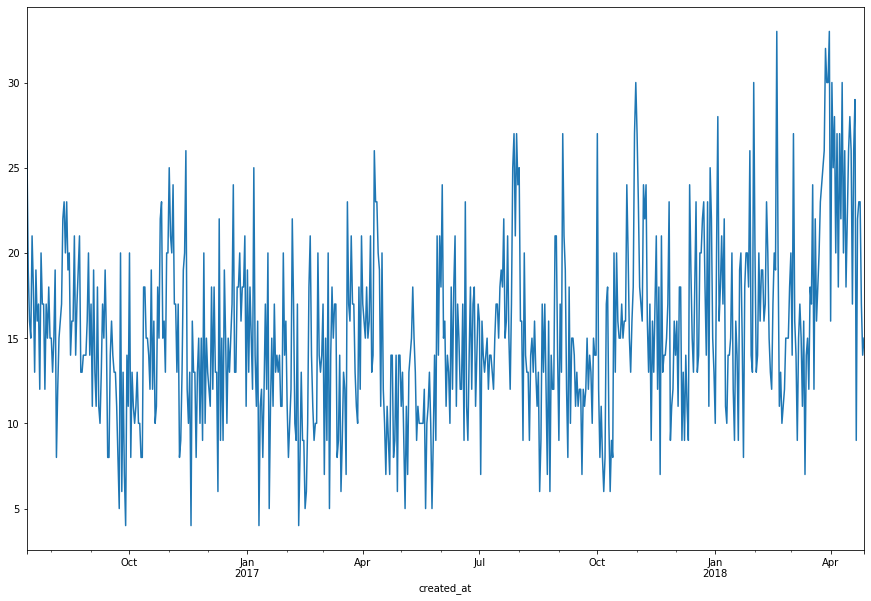

In [34]:
df.resample('D', on='created_at').count()['id'].plot()